In [42]:
!pip install -r requirements.txt

  Using cached matplotlib-3.4.2-cp38-cp38-win_amd64.whl (7.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp38-cp38-win_amd64.whl (51 kB)


In [79]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [4]:
dataset = pd.read_csv('./dataset/creditcard.csv')

In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [30]:
dataset_new_X = dataset.iloc[:, 1:30]
dataset_new_y = dataset.iloc[:, 30:31]

In [25]:
#dataset_new_X = dataset_new_X.apply(pd.to_numeric)
#dataset_new_y = dataset_new_y.apply(pd.to_numeric)

In [27]:
print(dataset_new_X.columns)
print(dataset_new_y.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [81]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset_new_X, dataset_new_y, test_size = 0.2)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr_model = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors = 5)

In [83]:
# Reference: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

sc = sklearn.preprocessing.StandardScaler()
X_train['Amount'] = sc.fit_transform(X_train[['Amount']].values)
X_test['Amount'] = sc.transform(X_test[['Amount']].values)

c:\users\rachit.trivedi\desktop\virtualenv\credit-card-classification-venv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\rachit.trivedi\desktop\virtualenv\credit-card-classification-venv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [72]:
lr_model.fit(X_train, y_train['Class'].ravel())

LogisticRegression()

In [84]:
knn.fit(X_train, y_train['Class'].ravel())

KNeighborsClassifier()

In [85]:
knn_predictions = knn.predict(X_test)

(array([56874.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

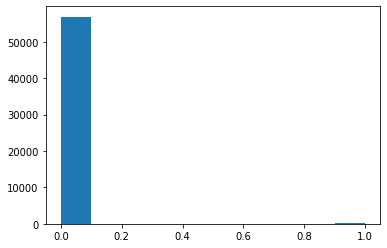

In [86]:
plt.hist(knn_predictions)

(array([56874.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

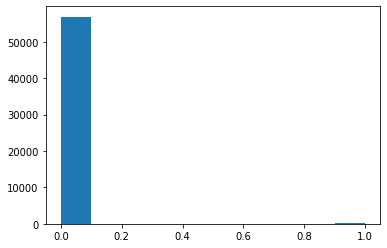

In [74]:
plt.hist(y_test['Class'].ravel())

In [87]:
f1_score(y_test['Class'].ravel(), knn_predictions)

0.837696335078534

In [88]:
# saving the model and standard scaler (for model deployment)
# Reference: https://machinelearningmastery.com/how-to-save-and-load-models-and-data-preparation-in-scikit-learn-for-later-use/

from pickle import dump

dump(knn, open('knn_model.pkl', 'wb'))
dump(sc, open('scaler.pkl', 'wb'))